In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


## Load a dataset

In [10]:
import numpy as np
import gzip
import pickle
import sys

with gzip.open("mnist.pkl.gz", "rb") as f:
    if sys.version_info < (3,):
        data = pickle.load(f)
    else:
        data = pickle.load(f, encoding="bytes")

(x_train, y_train), (x_test, y_test)= data

np.savez("mnist.npz",
         x_train=x_train,
         y_train=y_train,
         x_test=x_test,
         y_test=y_test)

print("mnist.npz created!")



mnist.npz created!


In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
x_train.shape

(60000, 28, 28)

Text(0.5, 1.0, '3')

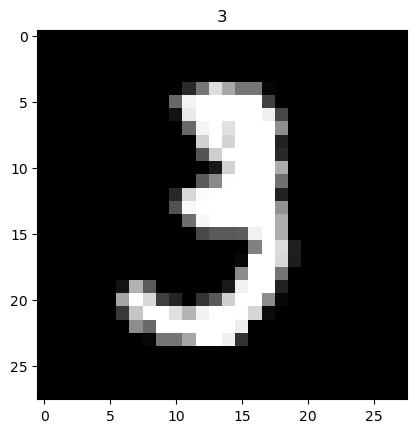

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10], cmap='gray')
plt.title(y_train[10])

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9121 - loss: 0.3005
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9580 - loss: 0.1415
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1065
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0866
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9768 - loss: 0.0751


In [22]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9777 - loss: 0.0732


[0.0732005164027214, 0.9776999950408936]

In [23]:
y_test[12]

np.uint8(9)

In [24]:
x_test[10].shape

(28, 28)

In [25]:
test_sample = x_test[12].reshape(1,28,28)

In [26]:
model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[-11.117443  ,  -7.8259993 ,  -7.6290236 ,  -1.5392151 ,
          2.208027  ,  -4.41703   , -12.331573  ,  -0.17502853,
         -3.4952102 ,   9.890118  ]], dtype=float32)

In [27]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [30]:
probability_model.predict(test_sample).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


np.int64(9)

In [ ]:
plt.imshow(test_sample[0]